## Importing Libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Summer-Olympic-medals-1976-to-2008 (1).csv',delimiter=',',encoding='latin-1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
df.shape

(15433, 11)

In [4]:
df.columns.tolist()

['City',
 'Year',
 'Sport',
 'Discipline',
 'Event',
 'Athlete',
 'Gender',
 'Country_Code',
 'Country',
 'Event_gender',
 'Medal']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()
df=df.dropna(how='all')
print(df.isnull().sum())

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


In [7]:
df=df.astype({'Year':'int'})

## Gender Ratio:

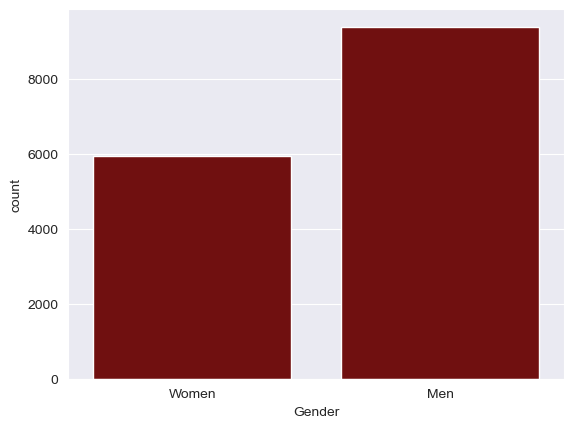

In [8]:
sns.set_style('darkgrid')
sns.set_palette(['maroon'])
sns.countplot(x='Gender',data=df)
plt.show()

## Insights:
- Men have significantly more participation than female in Olympics.

In [9]:
## Gender-wise meadl counts in the top 10 countries.
gender_medal_count=df.groupby(['Country','Gender']).size().reset_index(name='Medals')
country_totals=gender_medal_count.groupby('Country')['Medals'].sum().sort_values(ascending=False).index
top_10_countries=country_totals[:10]
gender_medal_count_top_10=gender_medal_count[gender_medal_count['Country'].isin(top_10_countries)]
gender_medal_count_top_10['Country']=pd.Categorical(gender_medal_count_top_10['Country'],categories=top_10_countries,ordered=True)
gender_medal_count_top_10=gender_medal_count_top_10.sort_values('Country')

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_14928\664997919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_medal_count_top_10['Country']=pd.Categorical(gender_medal_count_top_10['Country'],categories=top_10_countries,ordered=True)


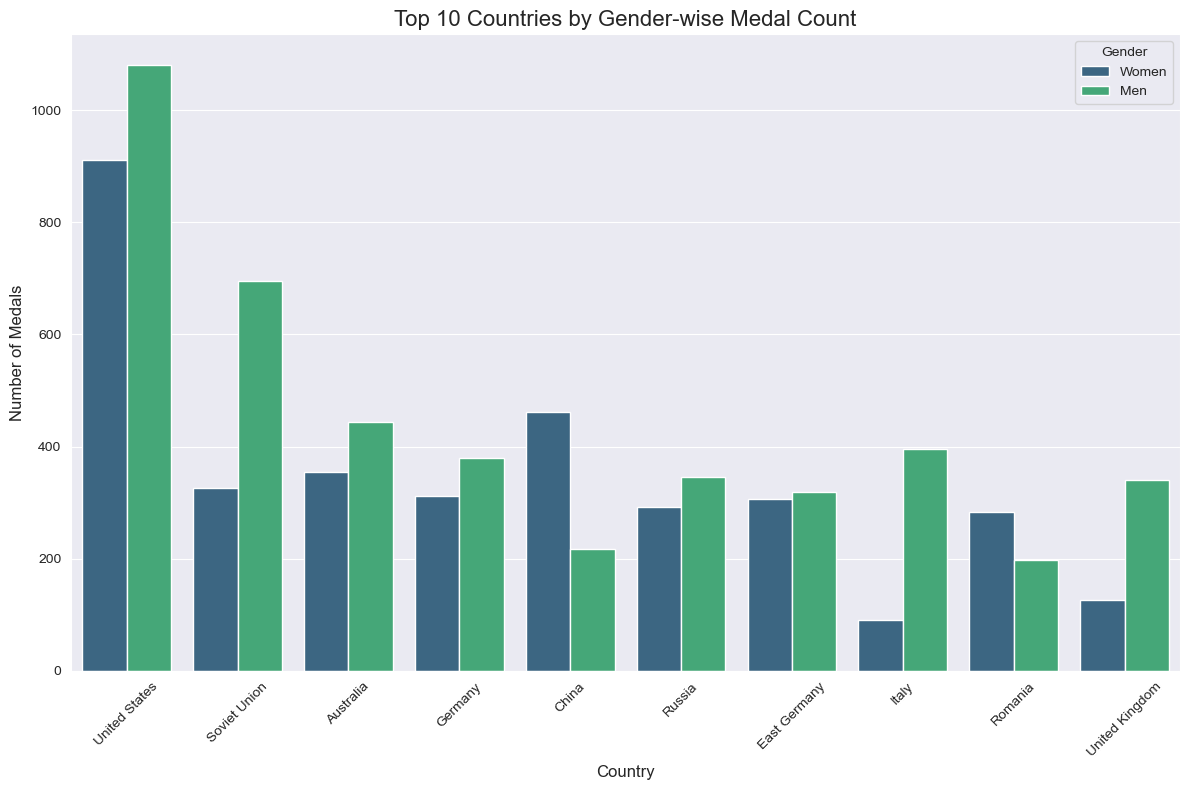

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(data=gender_medal_count_top_10,
            x='Country',
            y='Medals',
            hue='Gender',
            palette='viridis')

plt.title('Top 10 Countries by Gender-wise Medal Count',fontsize=16)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of Medals',fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## Insights:
- Some countries like China, Romania have more women count who have won medals for their country.
- Other countries have more male athlets winning, US being the top 1 in the list.

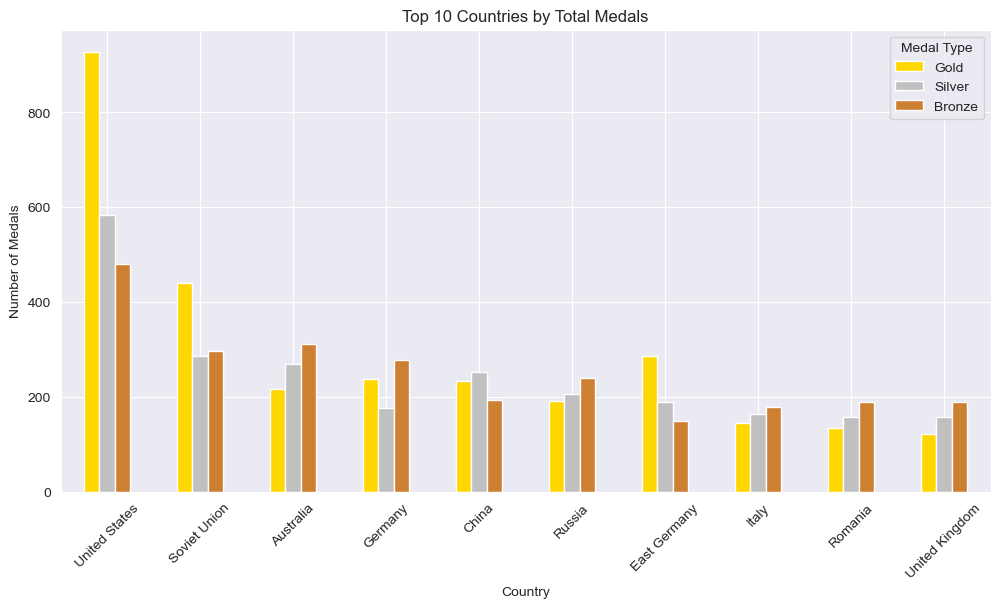

In [11]:
## Count of Gold, Silver and Bronze medals. Top countries by total no. of medals.
medals=df.groupby(['Country','Medal']).size().reset_index(name='Count')
medals_pivot=medals.pivot(index='Country',columns='Medal',values='Count').fillna(0)
medals_pivot['Total']=medals_pivot.sum(axis=1)
top_10=medals_pivot.sort_values('Total',ascending=False).head(10)
top_10[["Gold", "Silver", "Bronze"]].plot(
    kind="bar", figsize=(12,6), 
    color=["#FFD700", "#C0C0C0", "#CD7F32"]
)
plt.title("Top 10 Countries by Total Medals")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(title="Medal Type")
plt.show()

In [12]:
## Medalists who won medals in more than one sports.
df_clean = df.drop_duplicates(
    subset=['Athlete', 'Country_Code', 'Year', 'Event', 'Medal']
)
athlete_versatility=df.groupby(['Athlete','Country_Code']).agg(
    Unique_Sports=('Sport','nunique'),
    Total_Medals=('Medal','count')).reset_index()
multi_sport_medalists=(athlete_versatility[athlete_versatility['Unique_Sports']>1].sort_values(by=['Unique_Sports','Total_Medals'],ascending=False))
print('Multi_Sport Medalists (Medals in 2 or moe Unique Sports)')
print(multi_sport_medalists.head(10).to_markdown(numalign='left',stralign='left'))
# Check the maximum number of unique sports any athlete has medaled in
max_versatility = athlete_versatility['Unique_Sports'].max()

print(f"The maximum number of unique sports an athlete medaled in is: {max_versatility}")

Multi_Sport Medalists (Medals in 2 or moe Unique Sports)
|       | Athlete             | Country_Code   | Unique_Sports   | Total_Medals   |
|:------|:--------------------|:---------------|:----------------|:---------------|
| 11198 | YANG, Wei           | CHN            | 2               | 5              |
| 1536  | CHEN, Jing          | CHN            | 2               | 3              |
| 5243  | KOVACS, Istvan      | HUN            | 2               | 3              |
| 5793  | LI, Na              | CHN            | 2               | 3              |
| 2228  | DIMITROV, Stefan    | BUL            | 2               | 2              |
| 5108  | KOLESNIKOV, Nikolai | URS            | 2               | 2              |
| 5640  | LEE, Eun Kyung      | KOR            | 2               | 2              |
| 5801  | LI, Ting            | CHN            | 2               | 2              |
| 8554  | ROMERO, Rebecca     | GBR            | 2               | 2              |
| 10159 | TOMA, San

In [13]:
## Sports in which the top medalists won the medal.
if not multi_sport_medalists.empty:
    top_athlete=multi_sport_medalists.iloc[0]['Athlete']
    top_country=multi_sport_medalists.iloc[0]['Country_Code']
    athlete_details=df[(df['Athlete']==top_athlete) & (df['Country_Code']==top_country)]
    sports_list=athlete_details['Sport'].unique()
    print(f'Sports won by most versatile athlete: {top_athlete} ({top_country})')
    print(sports_list)

Sports won by most versatile athlete: YANG, Wei (CHN)
['Badminton' 'Gymnastics']


## Calculates effciency of the medals (gold-to-total-ratio) of a country.
- It might happen that a country having more medals but not gold and some other country having less medal but more gold medals. Here the analysis will help us in distinguishing between quantity and efficiency of success.

In [14]:
medal_counts=df.pivot_table(
    index='Country',
    columns='Medal',
    values='Athlete',
    aggfunc='count',
    fill_value=0)

required_medals=['Gold','Silver','Bronze']
for medal in required_medals:
    if medal not in medal_counts.columns:
        medal_counts[medal]=0

medal_counts['Total Medals']=medal_counts['Gold']+medal_counts['Silver']+medal_counts['Bronze']
medal_counts['Medal Efficiency']=(medal_counts['Gold']/medal_counts['Total Medals'].replace(0,1))
min_medals_threshold=10
efficient_countries=(medal_counts[medal_counts['Total Medals']>=min_medals_threshold].sort_values(by='Medal Efficiency',ascending=False)
                     [['Gold','Silver','Bronze','Total Medals','Medal Efficiency']]
                    )
print('Top Countries by Medal Efficiency (Min 10 Total Medals)')
print('\n')
print(efficient_countries.head(10).to_markdown(numalign='left',stralign='left',floatfmt='.3f'))

Top Countries by Medal Efficiency (Min 10 Total Medals)


| Country       | Gold    | Silver   | Bronze   | Total Medals   | Medal Efficiency   |
|:--------------|:--------|:---------|:---------|:---------------|:-------------------|
| Cameroon      | 20.000  | 0.000    | 1.000    | 21.000         | 0.952              |
| Zimbabwe      | 18.000  | 4.000    | 1.000    | 23.000         | 0.783              |
| India         | 17.000  | 1.000    | 4.000    | 22.000         | 0.773              |
| Denmark       | 78.000  | 20.000   | 50.000   | 148.000        | 0.527              |
| Ethiopia      | 15.000  | 5.000    | 12.000   | 32.000         | 0.469              |
| United States | 928.000 | 583.000  | 481.000  | 1992.000       | 0.466              |
| East Germany  | 286.000 | 190.000  | 150.000  | 626.000        | 0.457              |
| Cuba          | 152.000 | 109.000  | 88.000   | 349.000        | 0.436              |
| Soviet Union  | 439.000 | 285.000  | 297.000  | 1021.000    

## Result:
Although from above results we know that the top country by the total no. of medals is United States but the top country in terms of efficiency is Cameroon with a medal efficiency of 0.952 followed by Zimbabwe and India.

In [15]:
# Group by Gender and Discipline to calculate total medals and unique athletes.
gender_comparision=df.groupby(['Discipline','Gender']).agg( Total_Medals=('Medal','count'), Unique_Athletes=('Athlete','nunique')).reset_index()
print('Intermediate Data (Total Medals and Unique Athlete):\n',gender_comparision.head())

Intermediate Data (Total Medals and Unique Athlete):
     Discipline Gender  Total_Medals  Unique_Athletes
0      Archery    Men            81               57
1      Archery  Women            81               56
2  Artistic G.    Men           366              189
3  Artistic G.  Women           306              163
4    Athletics    Men           831              646


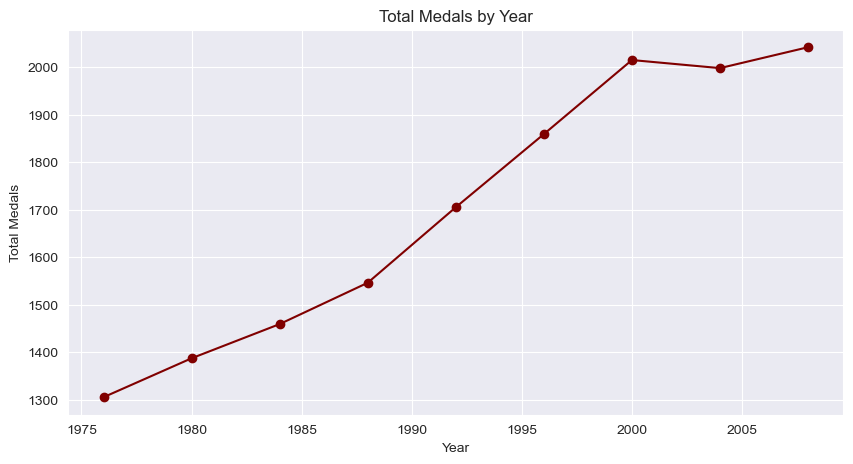

In [21]:
# Total Medals by Year
medals_by_year = df.groupby("Year")["Medal"].count().reset_index()

plt.figure(figsize=(10,5))
plt.plot(medals_by_year["Year"], medals_by_year["Medal"], marker="o")
plt.title("Total Medals by Year")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.savefig("total_medals_by_year.png", dpi=300, bbox_inches="tight")
plt.grid(True)
plt.show()


## Insights:
- Total no. of medals awarded has strong upward trend in all those years.
- No. of Total medals awarded almost doubled between 1976 (approx 1300) and 2000 (approx. 2000).

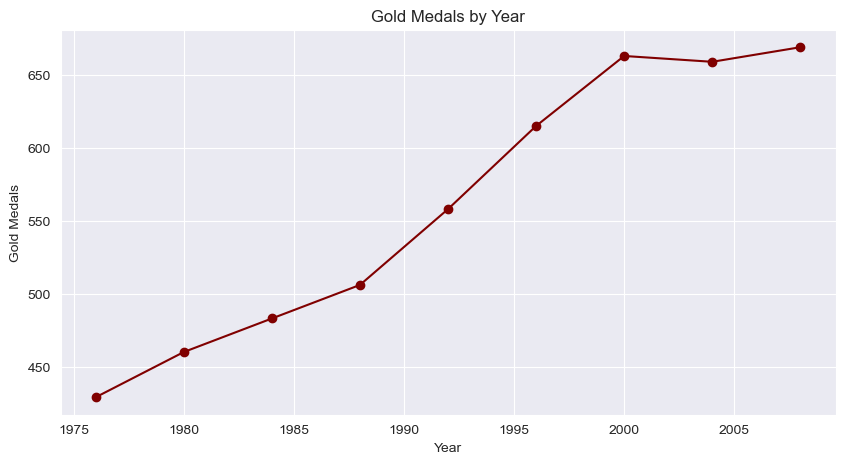

In [22]:
# Gold Medals by Year
gold_by_year = df[df["Medal"] == "Gold"].groupby("Year")["Medal"].count().reset_index()

plt.figure(figsize=(10,5))
plt.plot(gold_by_year["Year"], gold_by_year["Medal"], marker="o")
plt.title("Gold Medals by Year")
plt.xlabel("Year")
plt.ylabel("Gold Medals")
plt.savefig("gold_medals_by_year.png", dpi=300, bbox_inches="tight")
plt.grid(True)
plt.show()


## Insights:
- There's a strong increasing trend in gold medal from 1976 to 2008.
- Period between 1990 to 2000 shows the steepest increase.

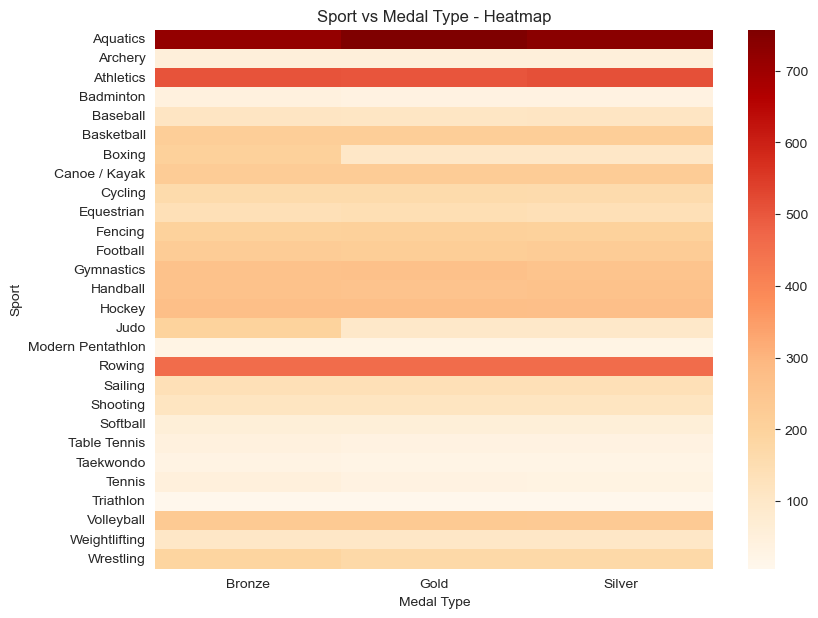

In [23]:
# Sport vs Medal Count Heatmap

sport_medal = df.pivot_table(
    index="Sport",
    columns="Medal",
    values="Athlete",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(9,7))
sns.heatmap(sport_medal, cmap="OrRd")
plt.title("Sport vs Medal Type - Heatmap")
plt.xlabel("Medal Type")
plt.ylabel("Sport")
plt.savefig("sports_vs_medal_type.png", dpi=300, bbox_inches="tight")
plt.show()


## Insights:
- Aquatics is the clear leader with highest no. of medals across the board.
- Many sports like Archery and Fencing have significantly lower medal counts.

## Summary:
- USA is the top overall performer

- China improved sharply after 2000

- Athletics & Swimming offer the highest medal opportunities

- Female participation increased over the years

- Some countries have high efficiency despite fewer medals